In [1]:
from src.img_toolbox import get_letters_dataset
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import pickle

# Creo el dataset con imágenes y sus etiquetas

In [2]:
letter_images_folder = "input/letter_dataset/training"

X, y = get_letters_dataset(letter_images_folder)

In [3]:
print("Numero total de features: ", len(X))
print("Numero total de labels", len(y))

Numero total de features:  39908
Numero total de labels 39908


Esta imagen:


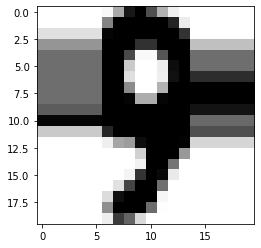

Corresponde a la letra o número:  9


In [4]:
# Por ejemplo:
print("Esta imagen:")
plt.imshow(X[220], cmap='Greys')
plt.show()

print("Corresponde a la letra o número: ", y[220])

In [5]:
# scale the raw pixel intensities to the range [0, 1] (this improves training)
X = np.array(X, dtype="float") / 255.0
y = np.array(y)


## Separar datos de Entrenamiento de datos de Test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
## Hago one-hot encoding con las etiquetas (cada letra/número estará separado en una columna)
lb = LabelBinarizer().fit(y_train)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)


In [8]:
labels_filename = "model_labels.dat"

# Guardo los mapeos de labels para los one-hot encodings.
# Usaré este mapa para entender la predicción que haré (justo al final del notebook `03 - Usar el modelo y probar leer captchas`)
with open(labels_filename, "wb") as f:
    pickle.dump(lb, f)

# Construir la Red Neuronal

In [9]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.callbacks import EarlyStopping


In [10]:
# De todas las que he probado esta sigue siendo la mejor entrenándola con 10 epochs
def model_topologia_1(num_of_possible_characters):
    # Instancio el modelo
    model = Sequential()

    # Añado una Primera Capa convolucional con max pooling
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Añado una Segunda Capa convolucional con max pooling
    model.add(Conv2D(50, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Añado una capa oculta intermedia con 500 nodos
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    
    # Añado la última capa: la Capa de Salida con 36 nodos (uno por cada letra/número posible en nuestro set de datos)
    model.add(Dense(num_of_possible_characters, activation="softmax"))
    
    # Construyo el modelo TensorFlow
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [11]:
def model_topologia_2(num_of_possible_characters):
    model = Sequential()

    model.add(Conv2D(32, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    
    model.add(Dense(num_of_possible_characters, activation="softmax"))
    
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [12]:
# Esta no va mal del todo
def model_topologia_3(num_of_possible_characters):
    # Instancio el modelo
    model = Sequential()

    # Añado una Primera Capa convolucional con max pooling
    model.add(Conv2D(32, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Añado una Segunda Capa convolucional con max pooling
    model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Añado una capa oculta intermedia con 500 nodos
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    
    # Añado la última capa: la Capa de Salida con 36 nodos (uno por cada letra/número posible en nuestro set de datos)
    model.add(Dense(num_of_possible_characters, activation="softmax"))
    
    # Construyo el modelo TensorFlow
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [13]:
# Esta tampoco se comporta mal
def model_topologia_4(num_of_possible_characters):
    # Instancio el modelo
    model = Sequential()

    # Añado una Primera Capa convolucional con max pooling
    model.add(Conv2D(32, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Añado una Segunda Capa convolucional con max pooling
    model.add(Conv2D(64, (5, 5), padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    
    # Añado una capa oculta intermedia con 1024 nodos
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    
    # Añado una capa oculta intermedia con 1024 nodos
    model.add(Flatten())
    model.add(Dense(1024, activation="relu"))
    
    # Añado la última capa: la Capa de Salida con 36 nodos (uno por cada letra/número posible en nuestro set de datos)
    model.add(Dense(num_of_possible_characters, activation="softmax"))
    
    # Construyo el modelo TensorFlow
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [14]:
def model_topologia_5(num_of_possible_characters):
    # Instancio el modelo
    model = Sequential()

    # Añado una Primera Capa convolucional con max pooling
    model.add(Conv2D(20, (5, 5), padding="same", input_shape=(20, 20, 1), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Añado una capa oculta intermedia con 500 nodos
    model.add(Flatten())
    model.add(Dense(500, activation="relu"))
    
    # Añado la última capa: la Capa de Salida con 36 nodos (uno por cada letra/número posible en nuestro set de datos)
    model.add(Dense(num_of_possible_characters, activation="softmax"))
    
    # Construyo el modelo TensorFlow
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model

In [15]:
num_of_possible_characters = 36
model = model_topologia_1(num_of_possible_characters)
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 20, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2000)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               1000500   
_________________________________________________________________
dense_1 (Dense)              (None, 36)                18036     
Total params: 1,019,056
Trainable params: 1,019,056
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
# Creo una función Early Stopping
monitor = EarlyStopping(monitor = "val_loss", 
                        min_delta = 1e-3, 
                        patience = 5, 
                        verbose = 2,
                        mode = "auto",
                        restore_best_weights = True)

In [17]:
# Entreno la Red Neuronal. 
# - epochs: un número exagerado (confio en el EarlyStopping). 
# - batch_size: 128
history = model.fit(X_train, 
                    y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=128, 
                    epochs=100, 
                    verbose=1, 
                    callbacks=[monitor])

Epoch 1/100
250/250 [==============================] - 18s 71ms/step - loss: 2.0303 - accuracy: 0.4647 - val_loss: 1.5849 - val_accuracy: 0.5710
Epoch 2/100
250/250 [==============================] - 18s 70ms/step - loss: 1.3686 - accuracy: 0.6284 - val_loss: 1.3475 - val_accuracy: 0.6320
Epoch 3/100
250/250 [==============================] - 18s 73ms/step - loss: 1.1461 - accuracy: 0.6816 - val_loss: 1.1924 - val_accuracy: 0.6750
Epoch 4/100
250/250 [==============================] - 17s 70ms/step - loss: 1.0113 - accuracy: 0.7176 - val_loss: 1.1311 - val_accuracy: 0.6885
Epoch 5/100
250/250 [==============================] - 17s 67ms/step - loss: 0.9206 - accuracy: 0.7426 - val_loss: 1.1167 - val_accuracy: 0.6917
Epoch 6/100
250/250 [==============================] - 18s 71ms/step - loss: 0.8404 - accuracy: 0.7635 - val_loss: 1.1037 - val_accuracy: 0.7012
Epoch 7/100
250/250 [==============================] - 17s 68ms/step - loss: 0.7711 - accuracy: 0.7824 - val_loss: 1.0796 - val_ac

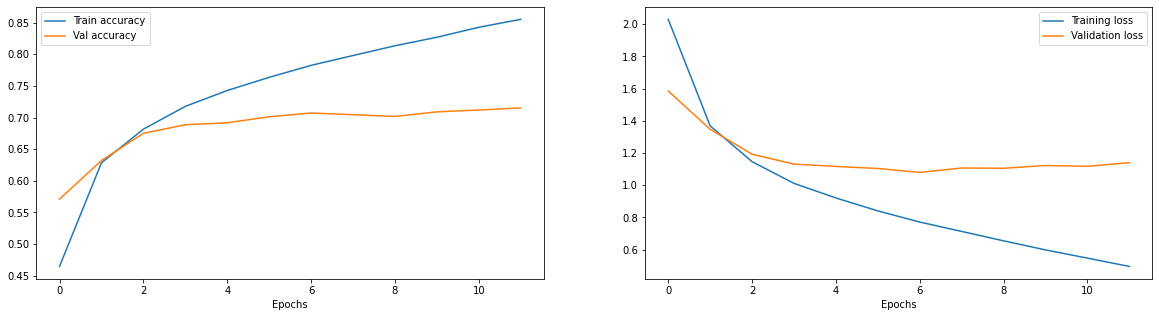

In [18]:
def plot_training_history(history, height, width):
    fig, axes = plt.subplots(1, 2, figsize=(height, width))

    axes[0].plot(history.history['accuracy'], label='Train accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Val accuracy')
    axes[0].set_xlabel('Epochs')
    axes[0].legend() 

    axes[1].plot(history.history['loss'], label='Training loss')
    axes[1].plot(history.history['val_loss'], label='Validation loss')
    axes[1].set_xlabel('Epochs')

    axes[1].legend()

plot_training_history(history, 20, 5)


In [19]:
# Guardo el modelo

model_file = "captcha_model.hdf5"

# Save the trained model to disk
model.save(model_file)

print("Modelo guardado...")


Modelo guardado...
